# Lab 3: Introduction to RF, Microwave, and Millimeter-Wave Measurments

## Background

![drawing.png](drawing.png)

As you know, 2-port networks have four S-parameters, the reflection coefficients being S11, S22, and the transmission coefficients S21, S12. In general, S21 is the measurement of the complex output/Input transfer function. Complex means that it represents both gain (or insertion loss) and phase relationship between the input and the output signals.  As shown in the equations below, gain is referred to as a positive number, and insertion loss is negative; both are typically expressed in dB.  The third equation is he phase response of the network. In this lab, our main focus will be on the phase response of the system, rather than the magnitude response. In regard to S21, the phase defines how much shift occurs for each frequency.
![equation1.png](equation1.png)
![equation1.png](equation2.png)
![equation1.png](equation3.png)


## Design

For this lab we will take measurments of your TRL kit you designed first in the ANSYS Electronic Desktop and then in HFSS. 

![thrucircuit.png](thrucircuit.png) 
Thru deisgn from Electronics Desktop

![THRU.png](THRU.png) 
Thru design from HFSS

Tip: When designing your wave ports, make them large enough to ensure proper computing of S-Parameter. You can do so by following a similar method as the equations I used, seen below in "Properties." 
![properties.png](properties.png) 
A correctly sized wave port will have a field like the one shown here.
![field.png](field.png)  


Tip: You can confirm that your integration lines are in the same direction for both of your wave ports by checking them under "Excitations" in the Project Manager.

![excitation1.png](excitation1.png)![excitation2.png](excitation2.png) 
                  

## Measurments in ANSYS

Frequency Sweep using a linear count from 2 GHz to 4.5 GHz

![phase_plot.PNG](phase_plot.PNG)
Phase Plot from Electronics Desktop

![hfss_phase_plot.PNG](hfss_phase_plot.PNG)
Phase Plot from HFSS

Now, to verfiy our results we obtained from the simulations we got from ANSYS, we will use a python package for RF measurements and simulations is the package scikit-rf or skrf. This lab is based of the assumption that you already have installed skrf on your device. The implementation of the skrf package is as follows.

In [26]:
#import all your stuff
import skrf as rf
from matplotlib import pyplot as plt
from skrf.calibration import OnePort
from skrf.calibration.calibration import TRL
from skrf import data
import numpy as np

#import your snp files from Electronics Desktop simulation
T = rf.Network('Lab3_thru.s2p')
R = rf.Network('Lab3_reflect.s1p')
L = rf.Network('Lab3_line.s2p')



/anaconda3/lib/python3.6/site-packages/skrf/calibration/calibration.py:2016: UserWarning: No switch terms provided
  warn('No switch terms provided')


# Now we must change the R term into a s2p type, or else you will get this error


![error.png](error.png) 

In [31]:
freq = rf.Frequency(2,4.5,2501,'ghz')
S = R.s
refl_S = 1j*np.zeros((2501,2,2)) 
refl_S[:,0,0] = S[:,0,0]
refl = rf.Network(name='Refl', frequency=freq, s=refl_S, z0=[ 50, 50 ])

#setup the TRL calibration in skrf.
measured = [T, refl, L]

trl = TRL(measured=measured)

/anaconda3/lib/python3.6/site-packages/skrf/calibration/calibration.py:2016: UserWarning: No switch terms provided
  warn('No switch terms provided')


In [32]:
print("Thru: ", T, "\n")
print("Line: ", L, "\n")
print("Reflect: ", R, "\n")
#see how it was 1-port, now its 2-port
print("Reflect: ", refl, "\n")

Thru:  2-Port Network: 'Lab3_thru',  2.0-4.5 GHz, 2501 pts, z0=[ 50.+0.j  50.+0.j] 

Line:  2-Port Network: 'Lab3_line',  2.0-4.5 GHz, 2501 pts, z0=[ 50.+0.j  50.+0.j] 

Reflect:  1-Port Network: 'Lab3_reflect',  2.0-4.5 GHz, 2501 pts, z0=[ 50.+0.j] 

Reflect:  2-Port Network: 'Refl',  2.0-4.5 GHz, 2501 pts, z0=[ 50.+0.j  50.+0.j] 



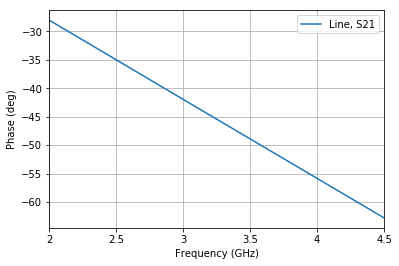

In [33]:
dut_L = trl.apply_cal(L)
dut_L.s12.plot_s_deg(label='Line, S21')
plt.grid() 
plt.show()